# Logistic Regression for MNIST Hand Written Digits

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torchvision

In [3]:
trainingdata = torchvision.datasets.MNIST('./MNIST',train=True, transform=torchvision.transforms.ToTensor(), download=True)
testdata = torchvision.datasets.MNIST('./MNIST',train=False, transform=torchvision.transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



In [4]:
print(len(trainingdata), len(testdata))

60000 10000


torch.Size([1, 28, 28]) 8


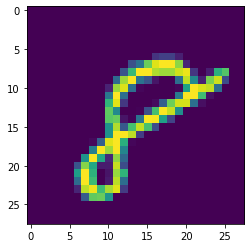

In [5]:
image, label = trainingdata[59999]
print(image.shape, label)

plt.imshow(image.squeeze().numpy())
plt.show()

In [6]:
traindataloader = torch.utils.data.DataLoader(trainingdata, batch_size=64, shuffle=True)
testdataloader = torch.utils.data.DataLoader(testdata, batch_size=64, shuffle=False)

In [7]:
images, labels = iter(traindataloader).next()
print(images.size(), labels)

torch.Size([64, 1, 28, 28]) tensor([4, 2, 1, 5, 2, 8, 5, 7, 8, 2, 0, 9, 7, 2, 6, 3, 2, 2, 6, 7, 3, 9, 6, 0,
        5, 2, 7, 5, 0, 6, 5, 6, 4, 8, 3, 1, 2, 8, 3, 2, 0, 2, 2, 1, 1, 3, 8, 1,
        6, 9, 4, 1, 6, 3, 4, 3, 3, 7, 7, 4, 2, 3, 7, 3])


In [10]:
class LR(torch.nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.linear1 = torch.nn.Linear(28*28, 128) # W:784x128 , b:128x1 , parameters = [W,b]
        self.linear2 = torch.nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1,28*28)
        transformed_x1 = self.linear1(x)
        transformed_x2 = self.linear2(transformed_x1)
        return transformed_x2
net = LR()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
train_loss_history = []
test_loss_history = []

for epoch in range(20):
    train_loss = 0.0
    test_loss = 0.0
    for i, data in enumerate(traindataloader):
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        predicted_output = net(images)
        loss = criterion(predicted_output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    for i, data in enumerate(testdataloader):
        with torch.no_grad():
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()
            predicted_output = net(images)
            loss = criterion(predicted_output, labels)
            test_loss += loss.item()
    train_loss = train_loss/len(traindataloader)
    test_loss = test_loss/len(testdataloader)
    train_loss_history.append(train_loss)
    test_loss_history.append(test_loss)
    print('Epoch %s finished with train loss %s and test loss %s'%(epoch, train_loss, test_loss))

In [ ]:
predicted_output = net(images)
print(predicted_output[1])
print(torch.max(predicted_output, 1)[1])
loss = criterion(predicted_output, labels)
print(labels)
print(loss)